# Prototyping and noodles

In [64]:
import cbpro
import pandas as pd
import pickle as pkl
import datetime
import matplotlib.pyplot as plt
import financialFunctions as ff
import coinbaseFunctions as cf
import utilityFunctions as uf
import numpy as np
import matplotlib.patches as patches
from decimal import *
import os
from os import listdir
from os.path import isfile, join
import Strategies as sg

#Makes it so a module is changed, it updates automatically on the code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
with open('../../../fredinhouTradingBot_Pvt/coinbase_credentials_1.pkl', 'rb') as f:
    credentials = pkl.load(f)
Client = cbpro.AuthenticatedClient(
    credentials['APIKey'],
    credentials['SecretKey'],
    credentials['passPhrase'],
    api_url = credentials['APIurl']
    )
testingDates = [[datetime.datetime.now() - datetime.timedelta(days = 3*356 + int(r)), datetime.datetime.now() - datetime.timedelta(days = 3*356 + int(r) - 60)] for r in np.random.random(size = 10)*120]

1.0


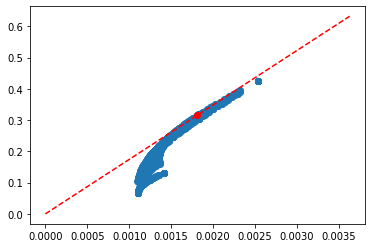

In [137]:
assets = ['BTC-USD', 'FIL-USD', 'LTC-USD']
start = datetime.datetime.now() - datetime.timedelta(days = 30)
end = datetime.datetime.now()
dataDict = ff.nicefyData(cf.getData(Client, assets, start = start, end = end, granularity = 60, verbose = True, header = ''))
xs = []
ys = []
for w1 in np.linspace(0.0001, 1, 10):
    uf.clear()
    print(w1)
    for w2 in np.linspace(0.0001, 1, 10):
        for w3 in np.linspace(0.0001, 1, 10):
            ws = np.array([w1, w2, w3])
            ws = ws/sum(ws)
            portfolio = {assets[i]:ws[i] for i in range(len(ws))}
            ys += [ff.portfolioReturn(dataDict, portfolio)]
            xs += [ff.portfolioVolatility(dataDict, portfolio)]
fig, ax = plt.subplots()
ax.scatter(xs, ys)
params['dataDict'] = dataDict
params['lookBackTime'] = 60*60*24*30
params['minimumTrade'] = 5
params['currentPortfolio'] = {'BTC-USD':1/3, 'FIL-USD':1/3, 'LTC-USD':1/3}
params['totalFunds'] = 100
buys, sells, msrPort = sg.maxSharpeRatio(params)
y = ff.portfolioReturn(dataDict, msrPort)
x = ff.portfolioVolatility(dataDict, msrPort)
ax.scatter(x, y, color = 'red')
ax.plot([0,x,2*x],[0,y,2*y], '--', color = 'red')

In [138]:
ff.portfolioReturn(dataDict, {'BTC-USD':1/3, 'FIL-USD':1/3, 'LTC-USD':1/3})

0.20744460743681464

In [139]:
ff.portfolioVolatility(dataDict, {'BTC-USD':1/3, 'FIL-USD':1/3, 'LTC-USD':1/3})

0.001318409043720282

In [140]:
ff.portfolioSharpeRatio(dataDict, {'BTC-USD':1/3, 'FIL-USD':1/3, 'LTC-USD':1/3})

157.3446484039947

In [141]:
msrPort

{'BTC-USD': 0.0, 'FIL-USD': 0.6294235839000756, 'LTC-USD': 0.3705764160999245}

In [557]:
assets = ['BTC-USD','ETH-USD','USD-USD']
ws = np.repeat(1/len(assets), len(assets))
for date in testingDates:
    dataDict = {}
    for asset in assets:
        dataDict[asset] = cf.getData(Client, asset, start = date[0], end = date[1], granularity = 60, verbose = False, header = '')[date[0] + datetime.timedelta(days = 15):date[0] + datetime.timedelta(days = 15, hours = 1)]
        if 'Return' in dataDict[asset].columns:
            dataDict[asset] = dataDict[asset].drop('Return', axis = 1)
        dataDict[asset]['Return'] = dataDict[asset]['Close'].pct_change()
        dataDict[asset] = dataDict[asset].dropna()
        
    params = {}
    params['dataDict'] = dataDict.copy()
    params['lookBackTime'] = 30*24*60
    params['minimumTrade'] = 5.0
    params['currentPortfolio'] = {assets[i]:ws[i] for i in range(len(assets))}
    params['totalFunds'] = 100.0
    print("Old Best Portfolio: " + str(Strategies.maxSharpeRatio(params)[2]))
    print("New Best Portfolio: " + str(Strategies.maxLogSigRatio(params)[2]))
    print('----------------------------------------------------------------')
    

Old Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
New Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
----------------------------------------------------------------
Old Best Portfolio: {'BTC-USD': 0.2915306975258765, 'ETH-USD': 0.6280555294127702, 'USD-USD': 0.08041377306135325}
New Best Portfolio: {'BTC-USD': 0.0, 'ETH-USD': 1.0, 'USD-USD': 0.0}
----------------------------------------------------------------
Old Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
New Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
----------------------------------------------------------------
Old Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
New Best Portfolio: {'BTC-USD': 1.0, 'ETH-USD': 0.0, 'USD-USD': 0.0}
----------------------------------------------------------------
Old Best Portfolio: {'BTC-USD': 0.0, 'ETH-USD': 1.0, 'USD-USD': 0.0}
New Best Portfolio: {'BTC-USD': 0.0, 'ETH-USD': 0.4963023338721427, 'USD-

In [540]:
testingDates[7]

[datetime.datetime(2020, 3, 6, 15, 50, 31, 387826),
 datetime.datetime(2020, 5, 5, 15, 50, 31, 387827)]

In [546]:
dataDict

{'BTC-USD':                        Close     High      Low     Open  Return     Volume
 Date                                                                      
 2020-03-21 15:51:00  6364.48  6381.70  6352.06  6374.72     NaN  90.780039
 2020-03-21 15:52:00  6352.01  6368.26  6352.00  6364.47     NaN  40.521722
 2020-03-21 15:53:00  6367.61  6367.89  6348.33  6352.75     NaN  13.572048
 2020-03-21 15:54:00  6358.60  6370.00  6353.74  6367.70     NaN  20.081588
 2020-03-21 15:55:00  6336.57  6361.93  6334.19  6358.60     NaN  32.144832
 ...                      ...      ...      ...      ...     ...        ...
 2020-04-20 15:46:00  6875.48  6877.04  6874.94  6874.95     NaN  11.348125
 2020-04-20 15:47:00  6875.85  6878.27  6874.94  6877.05     NaN  12.527635
 2020-04-20 15:48:00  6861.00  6876.24  6861.00  6875.85     NaN  18.913455
 2020-04-20 15:49:00  6866.85  6866.85  6856.91  6861.00     NaN  13.499915
 2020-04-20 15:50:00  6869.25  6869.63  6864.32  6865.34     NaN   6.200951
 

In [566]:
test = 'BTC-USD_1490417713_1493009713_60.pkl'
test.split("_",2)

['BTC-USD', '1490417713', '1493009713_60.pkl']

In [378]:
dataDict['BTC-USD'] = cf.getData(Client, 'BTC-USD', start = date[0], end = date[1], granularity = 60, verbose = False, header = '')
dataDict['ETH-USD'] = cf.getData(Client, 'BCH-USD', start = date[0], end = date[1], granularity = 60, verbose = False, header = '')
dataDict['ETH-USD'] = cf.getData(Client, 'ETH-USD', start = date[0], end = date[1], granularity = 60, verbose = False, header = '')
(dataDict['ETH-USD'].drop_duplicates()).index.duplicated().any()
#dataDict['BTC-USD']['Return'] = dataDict['BTC-USD']['Close'].pct_change().dropna()
#dataDict['BCH-USD']['Return'] = dataDict['BCH-USD']['Close'].pct_change().dropna()
#dataDict['ETH-USD']['Return'] = dataDict['ETH-USD']['Close'].pct_change().dropna()

False

In [329]:
xs = []
ys = []
for w1 in np.linspace(0,1,5):
    print(w1)
    for w2 in np.linspace(0,1,5):
        for w3 in np.linspace(0,1,5):
            ws = np.array([w1, w2, w3])
            ws = ws/sum(ws)
            i = 0
            port = {}
            for key in dataDict.keys():
                port[key] = ws[i]
                i += 1
            xs += [ff.portfolioVolatility(dataDict, port)]
            ys += [ff.portfolioReturn(dataDict, port)]
msrPort = ff.maximumSharpeRatio(dataDict)
msrX = ff.portfolioVolatility(dataDict, msrPort)
msrY = ff.portfolioReturn(dataDict, msrPort)


0.0


/Users/andreguimaraes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


0.25
0.5
0.75
1.0


In [56]:
#Backtracking
import datetime
import numpy as np
downloadedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
now = datetime.datetime.now()
testingTimeInterval = [now - datetime.timedelta(days = 5*365), now - datetime.timedelta(days = 1*365)]
epochDuration = 30*24*60*60
numberOfEpochs = 10
maxTimeDelta = (testingTimeInterval[-1]-testingTimeInterval[0]).total_seconds() - 3*epochDuration
testTimes = []
intervalBetweenDataGather = 60*60
for i in range(numberOfEpochs):
    t1 = testingTimeInterval[0] + datetime.timedelta(seconds = np.random.randint(low = epochDuration,high = maxTimeDelta))
    t2 = t1 + datetime.timedelta(seconds = int(2.1*epochDuration))
    testTimes += [[t1,t2]]
pd.DataFrame(testTimes, columns = ['Start','End']).to_csv("datesTest.csv")
a = pd.read_csv("datesTest.csv", parse_dates=['Start', 'End'])
a = a.drop('Unnamed: 0', axis = 1)
timesList = []
timesList = [[a.iloc[i]['Start'],a.iloc[i]['End']] for i in range(len(a))]
timesList

[[Timestamp('2016-07-10 09:06:24.149436'),
  Timestamp('2016-09-11 09:06:24.149436')],
 [Timestamp('2017-07-05 15:13:49.149436'),
  Timestamp('2017-09-06 15:13:49.149436')],
 [Timestamp('2017-01-18 12:48:31.149436'),
  Timestamp('2017-03-22 12:48:31.149436')],
 [Timestamp('2018-07-23 07:20:09.149436'),
  Timestamp('2018-09-24 07:20:09.149436')],
 [Timestamp('2017-02-23 02:30:15.149436'),
  Timestamp('2017-04-27 02:30:15.149436')],
 [Timestamp('2018-10-21 22:52:59.149436'),
  Timestamp('2018-12-23 22:52:59.149436')],
 [Timestamp('2016-07-10 00:52:44.149436'),
  Timestamp('2016-09-11 00:52:44.149436')],
 [Timestamp('2018-08-18 02:25:38.149436'),
  Timestamp('2018-10-20 02:25:38.149436')],
 [Timestamp('2016-06-26 10:02:16.149436'),
  Timestamp('2016-08-28 10:02:16.149436')],
 [Timestamp('2018-09-01 03:57:19.149436'),
  Timestamp('2018-11-03 03:57:19.149436')]]

In [738]:
fundsPerTime = {}
i = 0.
timeStart1 = datetime.datetime.now()
for times in testTimes:
    timeStart2 = datetime.datetime.now()
    pct1 = i/len(testTimes)*100.
    header1 = uf.progressBar(pct1, time0 = timeStart1) + "\n"
    fundsPerTime[str(times)] = []
    goodAssets = []
    for asset in downloadedAssets:
        if ff.availableData(asset, times[0]) and availableData(asset, times[1]):
            goodAssets += [asset]
    goodAssets = goodAssets + ['USD-USD']
    tradingFeePct = 0.005
    currentPortfolioSize = {asset:0. for asset in goodAssets}
    currentPortfolioSize['USD-USD'] = 100.
    dataDict = cf.getData(Client, goodAssets, start = times[0], end = times[1], granularity = 60, verbose = False, header = '')
    currentDate = times[0] + datetime.timedelta(seconds = epochDuration)
    iniDiff = (currentDate - times[0]).total_seconds()
    while (currentDate - times[0]).total_seconds() < 2*epochDuration:
        pct2 = ((currentDate - times[0]).total_seconds()-iniDiff)/(2*epochDuration)*100.
        uf.clear()
        print(uf.progressBar(pct2, time0 = timeStart2, header = header1))
        dataDictSoFar = {}
        for key in dataDict.keys():
            dataDictSoFar[key] = dataDict[key][:currentDate]
        totalFunds = 0
        for key in currentPortfolioSize.keys():
            totalFunds += currentPortfolioSize[key]*dataDictSoFar[key]['Close'][-1]
        print(totalFunds)
        currentPortfolio = {}
        for key in currentPortfolioSize.keys():
            currentPortfolio[key] = currentPortfolioSize[key]*dataDictSoFar[key]['Close'][-1]/totalFunds
        
        params = {}
        params['dataDict'] = dataDictSoFar.copy()
        params['lookBackTime'] = 60*60*24
        params['minimumTrade'] = 5
        #The current portfolio when this was called.
        params['currentPortfolio'] = currentPortfolio
        #The total ammount of funds available (in USD)
        params['totalFunds'] = totalFunds
        buys, sells, bestPortfolio = sg.maxSharpeRatio(params)
        for key in buys.keys():
            buys[key] = buys[key]*totalFunds/(dataDictSoFar[key]['Close'][-1])
        for key in sells.keys():
            sells[key] = sells[key]*totalFunds/(dataDictSoFar[key]['Close'][-1])
        currentPortfolioSize = makeFakeTrades(buys, sells, currentPortfolioSize, dataDictSoFar, tradingFeePct)        
        currentDate += datetime.timedelta(seconds = intervalBetweenDataGather)
        fundsPerTime[str(times)] += [totalFunds]
    i += 1

[#.................................................] 
[####..............................................] (approx 53m 34s)
98.9274931337584


KeyboardInterrupt: 

In [726]:
dataDict['REP-USD']

,Close,High,Low,Open,Return,Volume,index
Date,,,,,,,
2019-10-23 10:21:00,7.57,7.57,7.42,7.42,0.000000,52.196472,4259.0
2019-10-23 10:22:00,7.41,7.42,7.41,7.42,-0.021136,271.000000,4260.0
2019-10-23 10:23:00,7.46,7.47,7.46,7.47,0.006748,16.600000,4261.0
2019-10-23 10:24:00,7.45,7.45,7.45,7.45,-0.001340,7.000000,4262.0
2019-10-23 10:25:00,7.45,7.45,7.45,7.45,0.000000,7.200000,4263.0
...,...,...,...,...,...,...,...
2019-12-25 09:52:00,9.34,9.34,9.34,9.34,0.000000,13.656073,5412.0
2019-12-25 10:05:00,9.30,9.30,9.30,9.30,-0.004283,0.494108,5413.0
2019-12-25 10:07:00,9.34,9.34,9.34,9.34,0.004301,17.833643,5414.0


In [720]:
def makeFakeTrades(buys, sells, portfolioSize, dataDict, tradingFeePct):
    for key in sells.keys():
        if key != 'USD-USD':
            portfolioSize[key] -= sells[key]
            portfolioSize['USD-USD'] += sells[key]*dataDict[key]['Close'][-1]*(1-tradingFeePct)
            
    for key in buys.keys():
        if key != 'USD-USD':
            portfolioSize[key] += buys[key]
            portfolioSize['USD-USD'] -= buys[key]*dataDict[key]['Close'][-1]*(1-tradingFeePct)
            
    return portfolioSize

In [671]:
with open("../candlesDataBase/ALGO-USD/ALGO-USD_1570733820_1573325040_60.pkl", 'rb') as f:
    data = pkl.load(f)
data[testTimes[-1][0]:testTimes[-1][1]]

,low,high,open,close,volume
time,,,,,
2019-10-24 00:58:00,0.2028,0.2028,0.2028,0.2028,1250
2019-10-24 01:22:00,0.2016,0.2016,0.2016,0.2016,3000
2019-10-24 01:35:00,0.2007,0.2007,0.2007,0.2007,291
2019-10-24 01:36:00,0.2006,0.2006,0.2006,0.2006,1515
2019-10-24 01:44:00,0.2005,0.2005,0.2005,0.2005,695
...,...,...,...,...,...
2019-11-09 12:34:00,0.2559,0.2559,0.2559,0.2559,1
2019-11-09 12:38:00,0.2561,0.2563,0.2563,0.2561,78
2019-11-09 12:42:00,0.2567,0.2589,0.2567,0.2589,6462


In [669]:
print((datetime.datetime.timestamp(testTimes[-1][0]), datetime.datetime.timestamp(testTimes[-1][1])))

(1571896636.904792, 1577084236.904792)


In [190]:
data.reset_index(inplace = True)

In [191]:
dataff.maximumSharpeRatio(dataDict)

,Date,Low,High,Open,Close,Volume,Return


In [244]:
with open("../candlesDataBase/ETH-USD/ETH-USD_1498231858_1500823858_60.pkl", 'rb') as f:
    print(pkl.load(f))


                      Close    High     Low    Open  Return      Volume
Date                                                                   
2017-06-23 10:31:00  328.00  328.07  328.00  328.07     NaN    7.869500
2017-06-23 10:32:00  328.06  328.06  328.00  328.05     NaN    7.497429
2017-06-23 10:33:00  328.00  328.06  328.00  328.01     NaN   33.493148
2017-06-23 10:34:00  328.00  328.06  328.00  328.01     NaN   19.979300
2017-06-23 10:35:00  328.02  328.02  328.00  328.01     NaN    9.417400
...                     ...     ...     ...     ...     ...         ...
2017-07-23 10:26:00  229.64  229.64  229.63  229.64     NaN    7.207176
2017-07-23 10:27:00  229.63  229.64  229.63  229.64     NaN   13.206300
2017-07-23 10:28:00  229.63  229.64  229.63  229.64     NaN   40.695905
2017-07-23 10:29:00  229.51  229.63  229.50  229.63     NaN  240.878183
2017-07-23 10:30:00  228.81  229.50  228.81  229.50     NaN  112.427434

[42996 rows x 6 columns]


In [465]:
df = pd.DataFrame([[1,1],[1,2],[2,1]])
df

,0,1
0,1,1
1,1,2
2,2,1


In [767]:
import itertools
numbers = np.linspace(0.,1., num = 11, endpoint=True)
numbers = np.round(numbers,3)
print(numbers)
result = [list(itertools.permutations(seq)) for i in range(len(numbers), 0, -1) for seq in itertools.combinations(numbers, i) if (sum(seq) == 1 and len(seq) == 3)]
resultTemp = []
for res in result:
    for r in res:
        resultTemp += [r]
print(sorted(resultTemp))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[(0.0, 0.1, 0.9), (0.0, 0.2, 0.8), (0.0, 0.3, 0.7), (0.0, 0.4, 0.6), (0.0, 0.6, 0.4), (0.0, 0.7, 0.3), (0.0, 0.8, 0.2), (0.0, 0.9, 0.1), (0.1, 0.0, 0.9), (0.1, 0.2, 0.7), (0.1, 0.3, 0.6), (0.1, 0.4, 0.5), (0.1, 0.5, 0.4), (0.1, 0.6, 0.3), (0.1, 0.7, 0.2), (0.1, 0.9, 0.0), (0.2, 0.0, 0.8), (0.2, 0.1, 0.7), (0.2, 0.3, 0.5), (0.2, 0.5, 0.3), (0.2, 0.7, 0.1), (0.2, 0.8, 0.0), (0.3, 0.0, 0.7), (0.3, 0.1, 0.6), (0.3, 0.2, 0.5), (0.3, 0.5, 0.2), (0.3, 0.6, 0.1), (0.3, 0.7, 0.0), (0.4, 0.0, 0.6), (0.4, 0.1, 0.5), (0.4, 0.5, 0.1), (0.4, 0.6, 0.0), (0.5, 0.1, 0.4), (0.5, 0.2, 0.3), (0.5, 0.3, 0.2), (0.5, 0.4, 0.1), (0.6, 0.0, 0.4), (0.6, 0.1, 0.3), (0.6, 0.3, 0.1), (0.6, 0.4, 0.0), (0.7, 0.0, 0.3), (0.7, 0.1, 0.2), (0.7, 0.2, 0.1), (0.7, 0.3, 0.0), (0.8, 0.0, 0.2), (0.8, 0.2, 0.0), (0.9, 0.0, 0.1), (0.9, 0.1, 0.0)]


In [24]:
#File Clean-up
downloadedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
for asset in downloadedAssets:
    for file in listdir('../candlesDataBase/' + asset):
        if file[-3:] == 'pkl':
            with open('../candlesDataBase/' + asset + '/' + file, 'rb') as f:
                data = pkl.load(f)
            if 'Return' in list(data.columns):
                data = data.drop("Return", axis = 1)
            
            data.reset_index(inplace = True)
            data.columns = ['Date', 'Low', 'High', 'Open', 'Close', 'Volume']
            data.to_csv('../candlesDataBase/' + asset + '/' + file[:-3] + 'csv')
            print(file)

AAVE-USD_1612205820_1616957760_60.pkl
AAVE-USD_1608052380_1609613760_60.pkl
AAVE-USD_1609613820_1612205760_60.pkl
ADA-USD_1616083500_1616957760_60.pkl
ALGO-USD_1573326240_1575917040_60.pkl
ALGO-USD_1575918240_1578508980_60.pkl
ALGO-USD_1609613820_1612205760_60.pkl
ALGO-USD_1591470300_1594061460_60.pkl
ALGO-USD_1604429820_1607021760_60.pkl
ALGO-USD_1601837880_1604429760_60.pkl
ALGO-USD_1607021820_1609613760_60.pkl
ALGO-USD_1581101820_1583693700_60.pkl
ALGO-USD_1588878000_1591468380_60.pkl
ALGO-USD_1586285940_1588877760_60.pkl
ALGO-USD_1583693880_1586285760_60.pkl
ALGO-USD_1568141940_1570733760_60.pkl
ALGO-USD_1596653820_1599245760_60.pkl
ALGO-USD_1565884980_1568141640_60.pkl
ALGO-USD_1594062180_1596653760_60.pkl
ALGO-USD_1612205820_1616957760_60.pkl
ALGO-USD_1578510060_1581101760_60.pkl
ALGO-USD_1570733820_1573325040_60.pkl
ALGO-USD_1599245820_1601837760_60.pkl
ATOM-USD_1604444700_1607036580_60.pkl
ATOM-USD_1583708700_1586300580_60.pkl
ATOM-USD_1591484760_1594076580_60.pkl
ATOM-USD_1607

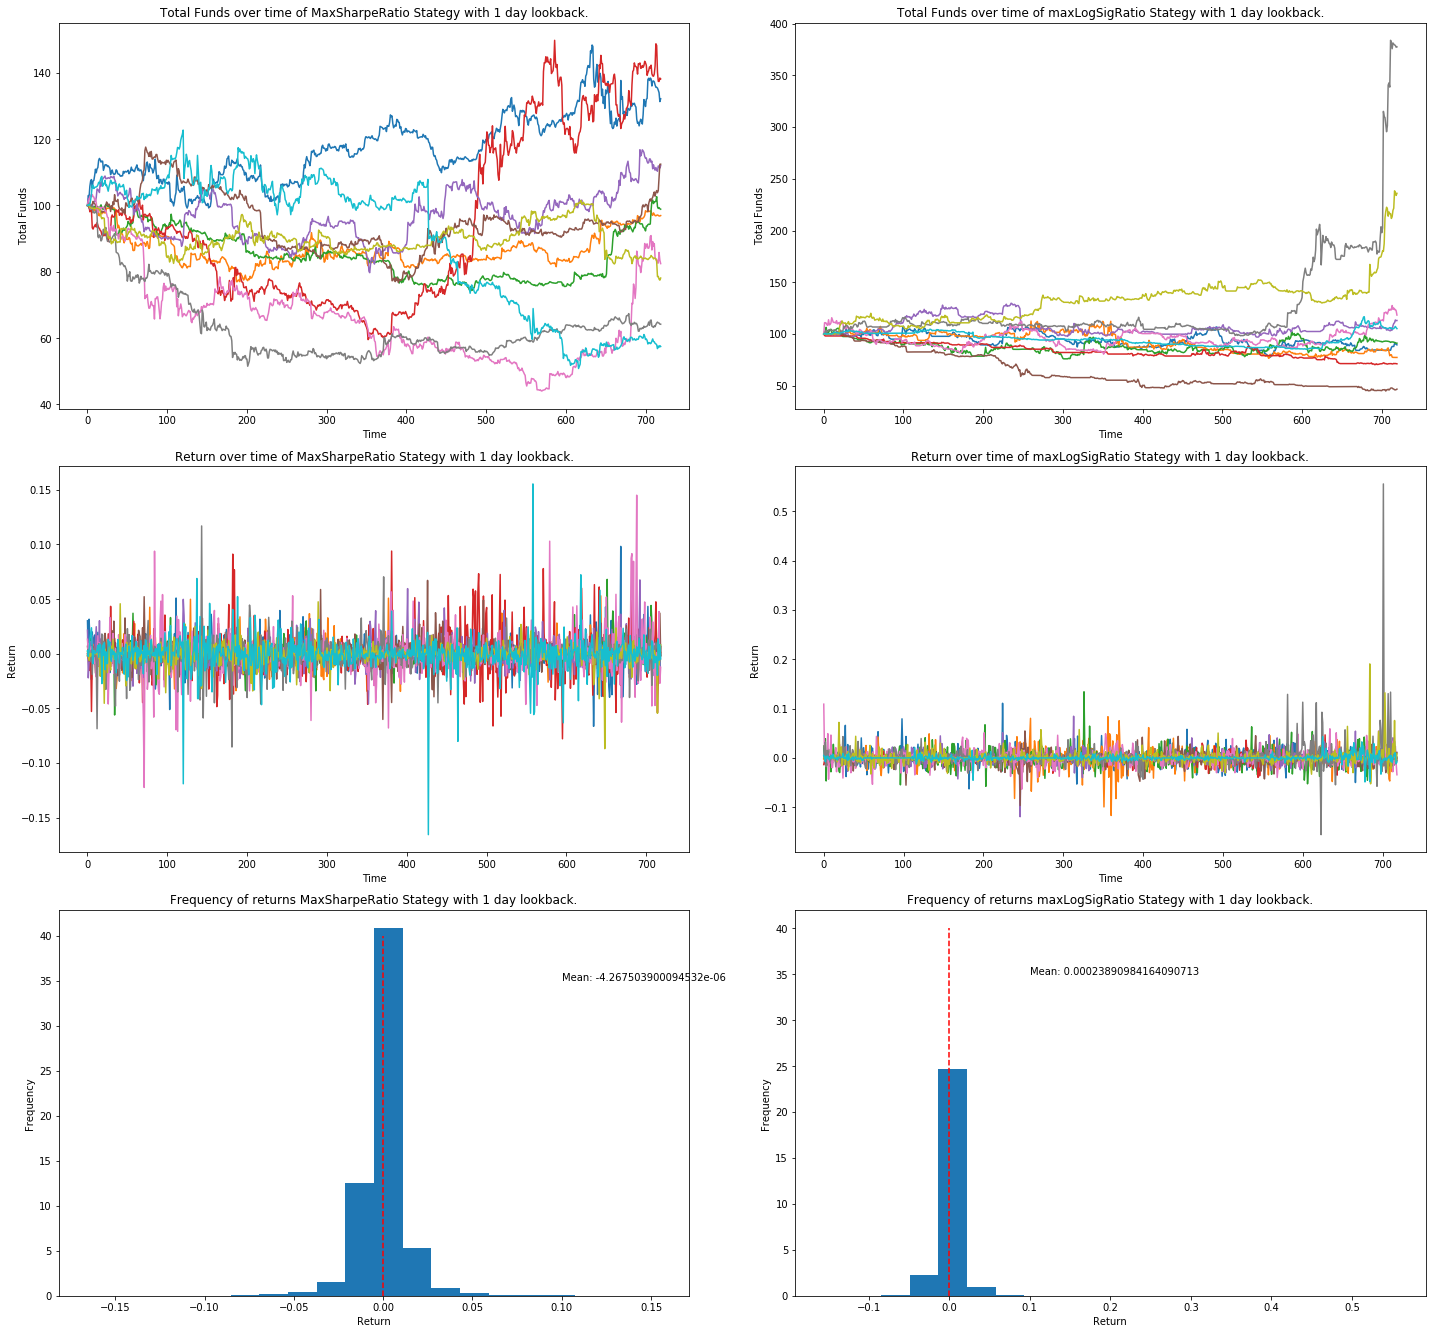

In [53]:
fig, ax = plt.subplots(3, 2, figsize = (20,30/1.61))

with open('backtrackRestult_01.pkl', 'rb') as f:
    data = pkl.load(f)
returns = {}
for key in data.keys():
    returns[key] = []
    for i in range(1,len(data[key])):
        returns[key] += [(data[key][i]-data[key][i-1])/(data[key][i-1])]
    ax[0, 0].plot(data[key])
    ax[1, 0].plot(returns[key])
ax[0, 0].set_xlabel("Time")
ax[0, 0].set_ylabel("Total Funds")
ax[0, 0].set_title("Total Funds over time of MaxSharpeRatio Stategy with 1 day lookback.")

ax[1, 0].set_xlabel("Time")
ax[1, 0].set_ylabel("Return")
ax[1, 0].set_title("Return over time of MaxSharpeRatio Stategy with 1 day lookback.")

totalReturns = []
for key in returns.keys():
    totalReturns += returns[key]
ax[2, 0].hist(totalReturns, bins = 20, density = True)
ax[2, 0].set_xlabel("Return")
ax[2, 0].set_ylabel("Frequency")
ax[2, 0].set_title("Frequency of returns MaxSharpeRatio Stategy with 1 day lookback.")
ax[2, 0].plot([np.mean(totalReturns),np.mean(totalReturns)],[0,40], '--',color = 'red')
ax[2, 0].text(0.1, 35, "Mean: " + str(np.mean(totalReturns)))

with open('backtrackRestult_02.pkl', 'rb') as f:
    data = pkl.load(f)
returns = {}
for key in data.keys():
    returns[key] = []
    for i in range(1,len(data[key])):
        returns[key] += [(data[key][i]-data[key][i-1])/(data[key][i-1])]
    ax[0, 1].plot(data[key])
    ax[1, 1].plot(returns[key])
ax[0, 1].set_xlabel("Time")
ax[0, 1].set_ylabel("Total Funds")
ax[0, 1].set_title("Total Funds over time of maxLogSigRatio Stategy with 1 day lookback.")

ax[1, 1].set_xlabel("Time")
ax[1, 1].set_ylabel("Return")
ax[1, 1].set_title("Return over time of maxLogSigRatio Stategy with 1 day lookback.")

totalReturns = []
for key in returns.keys():
    totalReturns += returns[key]
ax[2, 1].hist(totalReturns, bins = 20, density = True)
ax[2, 1].set_xlabel("Return")
ax[2, 1].set_ylabel("Frequency")
ax[2, 1].set_title("Frequency of returns maxLogSigRatio Stategy with 1 day lookback.")
ax[2, 1].plot([np.mean(totalReturns),np.mean(totalReturns)],[0,40], '--',color = 'red')
ax[2, 1].text(0.1, 35, "Mean: " + str(np.mean(totalReturns)))

fig.tight_layout()

fig.savefig("First Results.png")
    
    

In [32]:
data = pd.read_csv('../candlesDataBase/AAVE-USD/AAVE-USD_1608052380_1609613760_60.csv', parse_dates=['Date'])
data.columns

Index(['Unnamed: 0', 'Date', 'Low', 'High', 'Open', 'Close', 'Volume'], dtype='object')

In [23]:
data = pd.read_csv('../candlesDataBase/NU-USD/NU-USD_1606928700_1607095680_60.csv')
data.columns

Index(['Date', 'Low', 'High', 'Open', 'Close', 'Volume', 'Return'], dtype='object')

In [112]:
times = [30*24*60*60, 25*24*60*60, 20*24*60*60, 15*24*60*60, 10*24*60*60, 5*24*60*60]
import pickle as pkl
for time in times:
    params = {'lookBackTime':time}
    with open("BackTest01Files/paramsTest_" + str(time/(24*60*60)) + ".pkl",'wb') as f:
        pkl.dump(params, f)
    
    configFileA = """[Configurations]
strategy = maxSharpeRatio

header = Backtest for maxSharpeRatio with """ + str(time/(24*60*60)) + """ day(s)

tradingFeePct = 0.005

granularity = 60

startingFunds = 100.

minimumTrade = 5.

outputFile = /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly/BackTest01Files/BackTest01OutputA_""" + str(time/(24*60*60)) + """.pkl

cycleTime = 60*60

extraEarlyTime = """ + str(2*time) + """

allowedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
"""
    configFileB = """[Configurations]
strategy = maxLogSigRatio

header = Backtest for maxLogSigRatio with """ + str(time/(24*60*60)) + """ day(s)

tradingFeePct = 0.005

granularity = 60

startingFunds = 100.

minimumTrade = 5.

outputFile = /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly/BackTest01Files/BackTest01OutputB_""" + str(time/(24*60*60)) + """.pkl

cycleTime = 60*60

extraEarlyTime = """ + str(2*time) + """

allowedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
"""
    configFileC = """[Configurations]
strategy = equalWeights

header = Backtest for equalWeights with """ + str(time/(24*60*60)) + """ day(s)

tradingFeePct = 0.005

granularity = 60

startingFunds = 100.

minimumTrade = 5.

outputFile = /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly/BackTest01Files/BackTest01OutputC_""" + str(time/(24*60*60)) + """.pkl

cycleTime = 60*60

extraEarlyTime = """ + str(2*time) + """

allowedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
"""
    with open('BackTest01Files/configA_' + str(time/(24*60*60)) + '.ini', 'w') as f:
        f.write(configFileA)
    with open('BackTest01Files/configB_' + str(time/(24*60*60)) + '.ini', 'w') as f:
        f.write(configFileB)
    with open('BackTest01Files/configC_' + str(time/(24*60*60)) + '.ini', 'w') as f:
        f.write(configFileC)
    cwd = '/home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly'
    commandA = 'cd ' + cwd + ' && python backTest.py -c BackTest01Files/configA_' + str(time/(24*60*60)) + '.ini -d datesTest.csv -p BackTest01Files/paramsTest_' + str(time/(24*60*60)) + '.pkl' 
    commandB = 'cd ' + cwd + ' && python backTest.py -c BackTest01Files/configB_' + str(time/(24*60*60)) + '.ini -d datesTest.csv -p BackTest01Files/paramsTest_' + str(time/(24*60*60)) + '.pkl' 
    commandC = 'cd ' + cwd + ' && python backTest.py -c BackTest01Files/configC_' + str(time/(24*60*60)) + '.ini -d datesTest.csv -p BackTest01Files/paramsTest_' + str(time/(24*60*60)) + '.pkl' 
    print(commandA)
    print(commandB)
    print(commandC)
    
    

cd /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly && python backTest.py -c BackTest01Files/configA_30.0.ini -d datesTest.csv -p BackTest01Files/paramsTest_30.0.pkl
cd /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly && python backTest.py -c BackTest01Files/configB_30.0.ini -d datesTest.csv -p BackTest01Files/paramsTest_30.0.pkl
cd /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly && python backTest.py -c BackTest01Files/configC_30.0.ini -d datesTest.csv -p BackTest01Files/paramsTest_30.0.pkl
cd /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly && python backTest.py -c BackTest01Files/configA_25.0.ini -d datesTest.csv -p BackTest01Files/paramsTest_25.0.pkl
cd /home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase_Trader_2.0/pythonCodesOnly && python backTest.py -c BackTest01Files/configB_25.0.ini -d datesTest.csv -p BackTest01Files/paramsTest_25.0

In [2]:
import os
os.getcwd()

'/home/andrerg01/AutoTraders/fredinhouTradingBot/Coinbase Trader 2.0/pythonCodesOnly'

In [5]:
params = {'lookBackTime':30*24*60*60}
with open('paramsAutoTrader.pkl', 'wb') as f:
    pkl.dump(params, f)
    



In [10]:
a = eval("{'lookBackTime':30*24*60*60}")

2592000

In [11]:
datetime.datetime.now()

datetime.datetime(2021, 4, 1, 13, 45, 34, 769782)

In [29]:
a = {'dict':0}
b = [2]
isinstance(b, dict)

False

In [37]:
l =[[1,2,3,4],[2,3,42,1],[1,1,1,2]]
list(set(l[0]).intersection(*l))

[1, 2]

In [49]:
#File Clean-up
downloadedAssets = ['AAVE-USD', 'ADA-USD', 'ALGO-USD', 'ATOM-USD', 'BAL-USD', 'BAND-USD', 'BCH-USD', 'BNT-USD', 'BTC-USD', 'CGLD-USD', 'COMP-USD', 'DASH-USD', 'EOS-USD', 'ETC-USD', 'ETH-USD', 'FIL-USD', 'GRT-USD', 'KNC-USD', 'LINK-USD', 'LRC-USD', 'LTC-USD', 'MATIC-USD', 'MKR-USD', 'NMR-USD', 'NU-USD', 'OMG-USD', 'OXT-USD', 'REN-USD', 'REP-USD', 'SKL-USD', 'SNX-USD', 'SUSHI-USD', 'UMA-USD', 'UNI-USD','WBTC-USD', 'XLM-USD', 'XTZ-USD', 'YFI-USD', 'ZEC-USD', 'ZRX-USD']
for asset in downloadedAssets:
    for file in listdir('../candlesDataBase/' + asset):
        if file[-3:] == 'csv':
            st = os.stat('../candlesDataBase/' + asset + "/" + file) 
            mtime = datetime.datetime.now() - datetime.datetime.fromtimestamp(st.st_mtime)
            if mtime < datetime.timedelta(days = 1):
                os.system('rm ../candlesDataBase/' + asset + "/" + file)

In [55]:
d0 = datetime.datetime.now()
dates = [d0 + datetime.timedelta(minutes = i) for i in range(10)]
values1 = [1,2,3,4,float('nan'),6,7,float('nan'),9, 10]
values2 = [1,float('nan'),3,4,3,2,1,2,float('nan'),4]

pd.DataFrame([[values1[i], values2[i]] for i in range(len(values1))], index = dates).interpolate()

,0,1
2021-04-01 18:47:39.766936,1.0,1.0
2021-04-01 18:48:39.766936,2.0,2.0
2021-04-01 18:49:39.766936,3.0,3.0
2021-04-01 18:50:39.766936,4.0,4.0
2021-04-01 18:51:39.766936,5.0,3.0
2021-04-01 18:52:39.766936,6.0,2.0
2021-04-01 18:53:39.766936,7.0,1.0
2021-04-01 18:54:39.766936,8.0,2.0
2021-04-01 18:55:39.766936,9.0,3.0
2021-04-01 18:56:39.766936,10.0,4.0
